In [0]:
import pandas as pd
import numpy as np

import os

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
dcorlist = []
dtwlist = []
for i in range(2, 9):
    a = np.genfromtxt(os.path.join(root_path, 'dtw_dcor', 'conv{}_dcor_mean.csv'.format(i)), delimiter=',')
    dcorlist.append(a)
    b = np.genfromtxt(os.path.join(root_path, 'dtw_dcor', 'conv{}_dtw_mean.csv'.format(i)), delimiter=',')
    dtwlist.append(b)

In [0]:
np.savetxt(os.path.join(root_path, 'csv', 'dcor_mean.csv'), np.asarray(dcorlist), '%.2f', delimiter=',')
np.savetxt(os.path.join(root_path, 'csv', 'dtw_mean.csv'), np.asarray(dtwlist), '%.2f', delimiter=',')

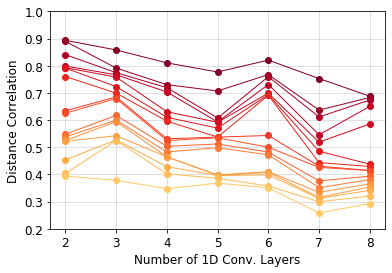

In [4]:
import matplotlib.pyplot as plt

num_plots = 16

dcor_ylist = []
for i in range(16):
    tmp = []
    for dl in dcorlist:
        tmp.append(dl[i])
    dcor_ylist.append(tmp)
plt.figure()
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.YlOrRd(np.linspace(1, 0.3, num_plots))))
for j in range(16):
    plt.plot([i for i in range(2, 9)], dcor_ylist[j], 'o-', lw=1)
    
plt.xlabel('Number of 1D Conv. Layers', size=12)
plt.ylabel('Distance Correlation', size=12)
plt.tick_params(labelsize=12)
plt.ylim(0.2,1)
plt.grid(alpha=0.5)
# plt.savefig(os.path.join(root_path, 'img', 'dcor_mean.pdf'), bbox_inches='tight')
plt.show()

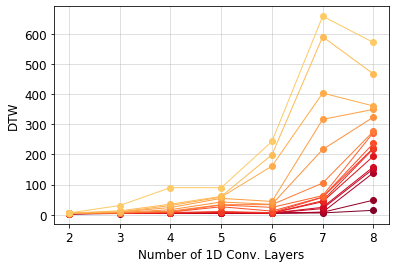

In [5]:
dtw_ylist = []
for i in range(16):
    tmp = []
    for dl in dtwlist:
        tmp.append(dl[i])
    dtw_ylist.append(tmp)
plt.figure()
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.YlOrRd(np.linspace(1, 0.3, num_plots))))
for j in range(16):
    plt.plot([i for i in range(2, 9)], dtw_ylist[j], 'o-', lw=1)
    
plt.xlabel('Number of 1D Conv. Layers', size=12)
plt.ylabel('DTW', size=12)
plt.tick_params(labelsize=12)
plt.grid(alpha=0.5)
# plt.savefig(os.path.join(root_path, 'img', 'dtw_mean.pdf'), bbox_inches='tight')
plt.show()

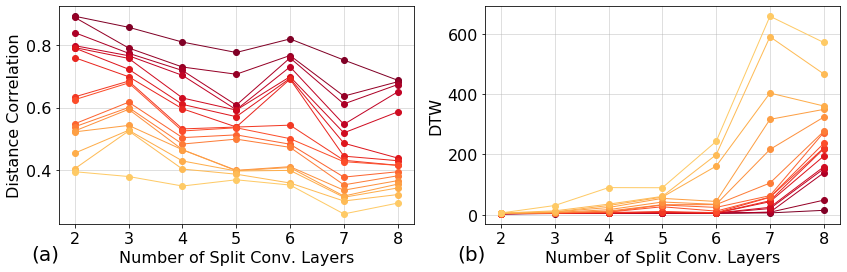

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

fig.text(0.098, 0, '(a)', size=20)
fig.text(0.52, 0, '(b)', size=20)

c = plt.cycler('color', plt.cm.YlOrRd(np.linspace(1, 0.3, num_plots)))

ax[0].set_prop_cycle(c)
ax[1].set_prop_cycle(c)

ax[0].set_xlabel('Number of Split Conv. Layers', size=16)
ax[0].set_ylabel('Distance Correlation', size=16)
ax[0].tick_params(labelsize=16)
ax[0].grid(alpha=0.5)
for j in range(16):
    ax[0].plot([i for i in range(2, 9)], dcor_ylist[j], 'o-', lw=1)

ax[1].set_xlabel('Number of Split Conv. Layers', size=16)
ax[1].set_ylabel('DTW', size=16)
ax[1].tick_params(labelsize=16)
ax[1].grid(alpha=0.5)
for j in range(16):
    plt.plot([i for i in range(2, 9)], dtw_ylist[j], 'o-', lw=1)

fig.savefig(os.path.join(root_path, 'img', 'dcor_dtw_mean.pdf'), bbox_inches='tight')

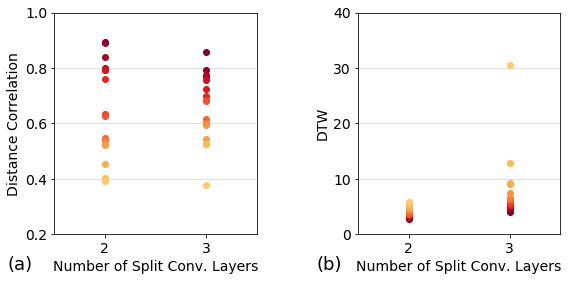

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

fig.text(0.02, 0.05, '(a)', size=18)
fig.text(0.555, 0.05, '(b)', size=18)

c = plt.cycler('color', plt.cm.YlOrRd(np.linspace(1, 0.3, num_plots)))

ax[0].set_prop_cycle(c)
ax[1].set_prop_cycle(c)

ax[0].set_xlabel('Number of Split Conv. Layers', size=14)
ax[0].set_ylabel('Distance Correlation', size=14)
ax[0].tick_params(labelsize=14)
ax[0].set_ylim(0.2, 1.0)
ax[0].set_xlim(1.5, 3.5)
ax[0].grid(axis='y', alpha=0.5)
ax[1].set_xlabel('Number of Split Conv. Layers', size=14)
ax[1].set_ylabel('DTW', size=14)
ax[1].tick_params(labelsize=14)
ax[1].set_ylim(0, 40)
ax[1].set_xlim(1.5, 3.5)
ax[1].grid(axis='y', alpha=0.5)

for j in range(16):
    ax[0].set_xticks([2, 3])
    ax[0].plot([i for i in range(2, 4)], dcor_ylist[j][:2], 'o')
for j in range(16):
    ax[1].set_xticks([2, 3])
    ax[1].plot([i for i in range(2, 4)], dtw_ylist[j][:2], 'o')
fig.tight_layout()
fig.subplots_adjust(wspace=0.5)

fig.savefig(os.path.join(root_path, 'img', 'dcor_dtw_leakage.pdf'), bbox_inches='tight')